Kako izgledaju naši podaci:

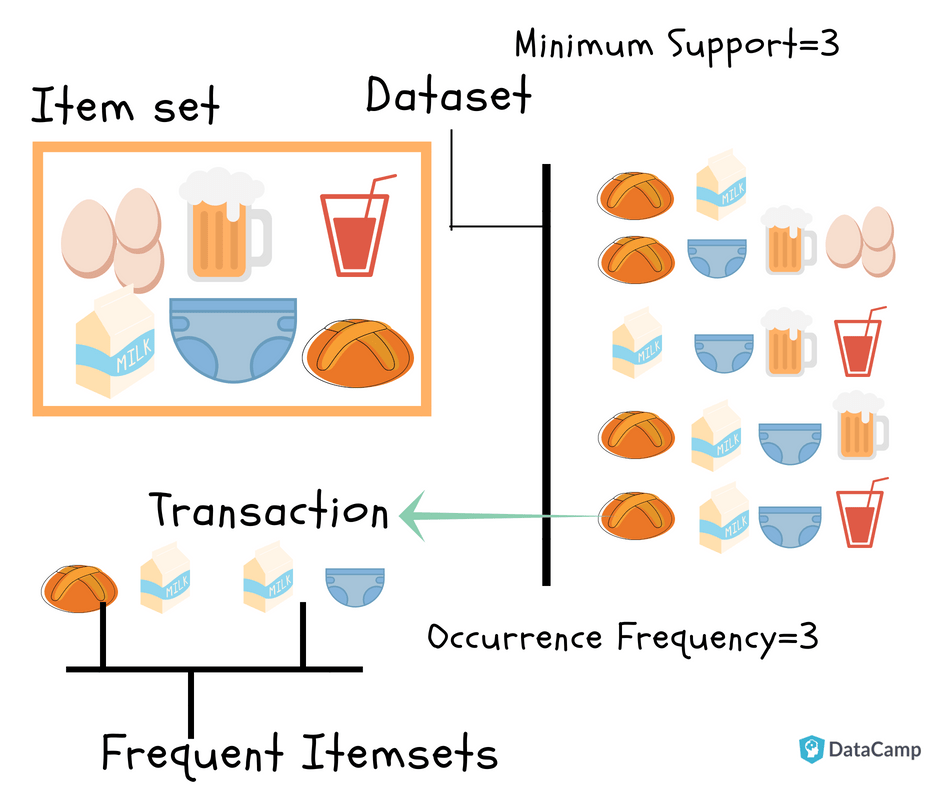

Šta želimo da izvučemo iz naših podataka: pravila oblika telo -> glava

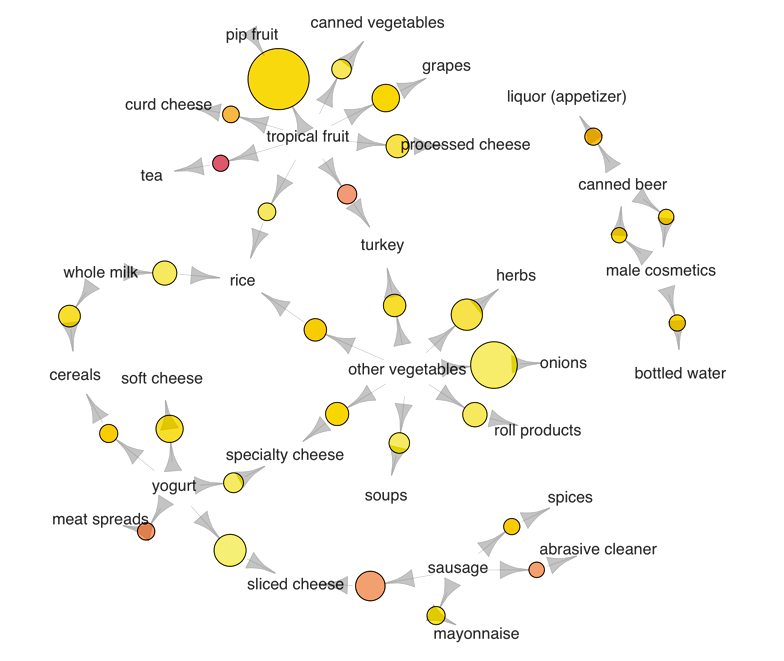

Osnovne mere za određivanje kvaliteta pravila pridruživanja su:
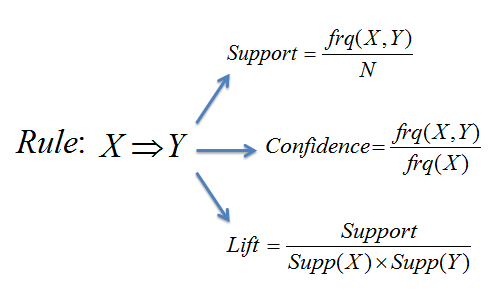

- **Podrška (Support)**: Ova mera pokazuje koliko često se skup stavki (i X i Y zajedno) pojavljuje u skupu podataka. Izračunava se kao udeo transakcija koje sadrže i X i Y u odnosu na ukupan broj transakcija. Visoka podrška ukazuje na to da su ove stavke česte u transakcijama.
- **Poverenje (Confidence)**: Ova mera pokazuje verovatnoću pronalaženja posledice u transakcijama pod uslovom da te transakcije takođe sadrže prethodnik. U pravilu {X} → {Y}, poverenje meri koliko često se Y pojavljuje kada je X prisutan.
- **Lift**: Ova mera pokazuje koliko se češće prethodnik i posledica pravila pojavljuju zajedno nego što bismo očekivali da su statistički nezavisni (meri snagu asocijacije između X i Y). Vrednost lift-a veća od 1 ukazuje na zavisnost između prethodnika i posledice. Lift procenjuje snagu pravila u odnosu na slučajnost — lift veći od 1 označava jako pravilo.

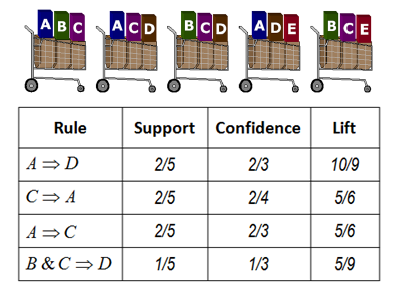

Cilj je izdvojiti pravila koja pridruživanja koja imaju:
- podršku ≥ min<sub>sup</sub>
- poverenje ≥ min<sub>conf</sub>

Minimalni prag podrške  min<sub>sup</sub> i minimalni prag pouzdanosti min<sub>conf</sub> zadaje korisnik.

Lift = $\frac{sup}{sup(X)*sup(Y)}$ = $\frac{conf(X->Y)}{sup(Y)}$

Ako je $conf(X->Y)=0.4$ -> u 40% transakcija u kojima se javlja X, javlja se i Y

Ako je $sup(Y)=0.4$ -> u 40% transakcija u skupu podataka javlja se Y

$=>$ Tada je vrednost mere Lift = 1 $=>$ pravilo X->Y nije interesantno jer se Y ne pojavljuje ni češće ni ređe u transakcijama koje sadrže X nego u celom skupu transakcija. Odnosno, X i Y se mogu smatrati nezavisnim.

Ako je Lift>1 $=>$ Y se pojavljuje u transakcijama koje sadrže X više od očekivanog broja pojavljivanja.

Ako je Lift<1 $=>$ Y se pojavljuje u transakcijama koje sadrže X manje od očekivanog broja pojavljivanja.

Zato se može postaviti uslov da se izdvoje pravila za koja važi da vrednost Lift mere nije u opsegu od na primer 0.95 i 1.1



1) Generisanje čestih skupova stavki: za skup stavki X kažemo da je čest ako važi sup(X) ≥  min<sub>sup</sub> 
- princip: Ako sup(X) < min<sub>sup</sub> $=>$ $\forall Y \, (X \subseteq Y)$ važi da je sup(Y) < min<sub>sup</sub>
- anti-monotonost podrške: $\forall X \, (X \subseteq Y)$ : sup(Y) ≤ sup(X)
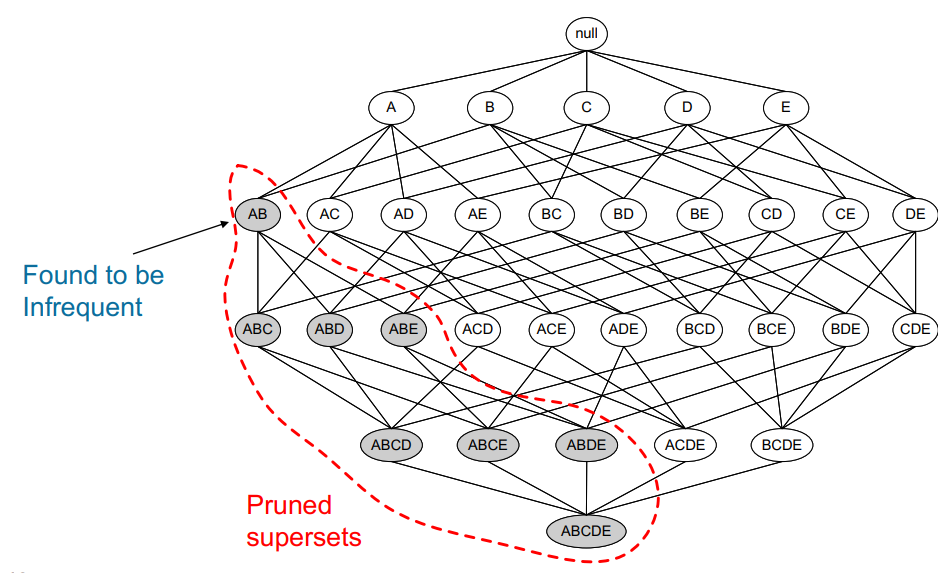


**AIS algoritam** je prvi istorijski algoritam za otkrivanje čestih skupova stavki.
Algoritam  prolazi kroz transakcije jednu po jednu, i proširuje kandidatske skupove na osnovu onoga što se pojavljuje u transakciji:
- Ako se u transakciji pojavi neki čest (frequent) 1-itemset, AIS pokuša da ga „proširi“ dodavanjem drugih itema iz iste transakcije.
- Svaki takav prošireni skup postaje kandidat.
- Kasnije se broje pojavljivanja kandidata i filtriraju oni koji prelaze minimum podrške

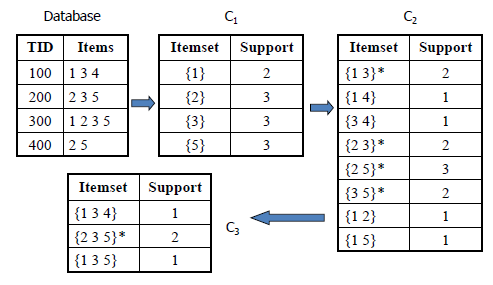

Problem: Svaka transakcija može generisati ogroman broj kombinacija što dovodi do eksplozija memorije, a mnoge kombinacije se nikada neće dovoljno puta pojaviti

**Appriori algoritam** je nastao kao poboljšanje AIS i SETM algoritama. Zasnovan je na principima koji važe za podršku: spaja česte k-itemset skupove stavke koji imaju zajednički prefiks za dobijanje k+1-itemset-a.

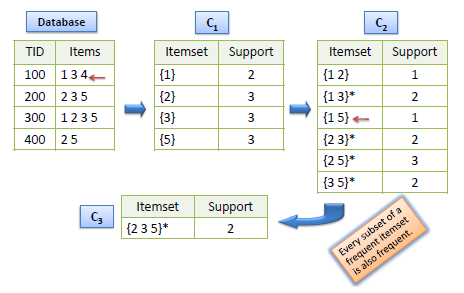

Problemi:
- Za k itemsetove, k prolaza kroz ceo dataset
- Generiše mnogo kandidata kad dataset ima puno itema
- por za vrlo velike transakcione baze

In [2]:
import pandas as pd
df = pd.read_csv('Grocery Products Purchase.csv')
df

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9835, 32)

In [6]:
#stack metoda pretvara svih 32 kolone u jednu i potom prebrojava koliko se svaka vrednost pojavljuje
item_counts = df.stack().value_counts()
print(item_counts)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Name: count, Length: 169, dtype: int64


In [7]:
support = item_counts / len(df)
print(support)

whole milk               0.255516
other vegetables         0.193493
rolls/buns               0.183935
soda                     0.174377
yogurt                   0.139502
                           ...   
bags                     0.000407
kitchen utensil          0.000407
preservation products    0.000203
baby food                0.000102
sound storage medium     0.000102
Name: count, Length: 169, dtype: float64


In [8]:
#!pip install apyori
from apyori import apriori

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5995 sha256=d2823706a2372957a207456a7ef19335dc443bae6090978991cb7b46b730f994
  Stored in directory: /home/marija/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [9]:
# preduslov: ovaj algoritam zahteva da prosledjeni podaci budu u formatu ugnježdena lista listi, a ne df
transactions = []
for index, row in data.iterrows(): # prolazi red po red kroz df
    items = [x for x in row.values if isinstance(x, str)] # row.values pretvara red u listu
                                                            # isinstance nam omogucava da uzmemo samo vrednosti koje su tipa str, dok NaN nije string
    transactions.append(items)


In [12]:
print(len(transactions))
transactions[:10]

9835


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

Rezultat apriori algoritma je generator koji vraća objekte tipa RelationRecord.
Jedan red tog generatora čini jedan čest itemset + sva pravila koja se mogu iz njega izvesti. Jedan RelationRecord ima 3 glavna dela:
- rule.items - u obliku frozenset jer je to nepromenljiv (immutable) skup u Pythonu, dok običan set u Pythonu ne može da bude ključ u mapi zbog svoje mutabilnosti
- rule.support
- rule.ordered_statistics - svaki element liste je objekat tipa OrderedStatistic u kome imamo sledeća polja dostupna
   - .items_base        # leva strana (antecedent)
   - .items_add         # desna strana (consequent)
   - .confidence        # confidence
   - .lift              # lift


In [32]:
res = apriori(transactions, min_support=0.01, min_confidence=0.4, min_lift=2) # postoji i parametar max_length=2, parametar min_length se ignorise
for record in res:
#     print(record)
    if len(record.items) > 1:
        #print(record.items)
        base = list(record.ordered_statistics[0].items_base)
        items = list(record.ordered_statistics[0].items_add)
        support = round(record.support * 100, 2)
        confidence = round(record.ordered_statistics[0].confidence * 100, 2)
        lift = round(record.ordered_statistics[0].lift, 2)

        print(f'{", ".join(base)} => {", ".join(items)}[S={support}%, C={confidence}%, L={lift}]')

chicken => other vegetables[S=1.79%, C=41.71%, L=2.16]
hamburger meat => other vegetables[S=1.38%, C=41.59%, L=2.15]
onions => other vegetables[S=1.42%, C=45.9%, L=2.37]
root vegetables => other vegetables[S=4.74%, C=43.47%, L=2.25]
whipped/sour cream => other vegetables[S=2.89%, C=40.28%, L=2.08]
other vegetables, butter => whole milk[S=1.15%, C=57.36%, L=2.24]
root vegetables, citrus fruit => other vegetables[S=1.04%, C=58.62%, L=3.03]
whole milk, citrus fruit => other vegetables[S=1.3%, C=42.67%, L=2.21]
curd, yogurt => whole milk[S=1.01%, C=58.24%, L=2.28]
domestic eggs, other vegetables => whole milk[S=1.23%, C=55.25%, L=2.16]
other vegetables, pip fruit => whole milk[S=1.35%, C=51.75%, L=2.03]
pork, whole milk => other vegetables[S=1.02%, C=45.87%, L=2.37]
root vegetables, rolls/buns => other vegetables[S=1.22%, C=50.21%, L=2.59]
tropical fruit, root vegetables => other vegetables[S=1.23%, C=58.45%, L=3.02]
root vegetables, whole milk => other vegetables[S=2.32%, C=47.4%, L=2.45]

MLXtend biblioteka - (Machine Learning Extensions) je Python biblioteka koja proširuje osnovne funkcionalnosti scikit-learn-a i drugih standardnih Python alata za mašinsko učenje. Njena snaga je u korisnim dodatnim funkcijama i implementacijama algoritama koji nisu u  standardnom skupu biblioteka, posebno za data mining i analizu uzoraka.

Glavne namene:
- Asocijativna pravila - Apriori i Association Rules je brža i robusnija od apyori i može direktno da radi sa Pandas DataFrame-om
- Feature Engineering / Transformacije (mlxtend.feature_selection, mlxtend.preprocessing)
- Ensemble (stacking) metodi (mlxtend.classifier, mlxtend.regressor) - omogućava kombinovanje više modela za bolju tačnost
- Evaluacija i vizualizacija modela (mlxtend.plotting - vizualizacija decision boundaries, confusion matrix, dendrograma, mlxtend.evaluate)
- Dodatne funkcije za Data Science (sortiranje matrica, pivot tabela, matrice konfuzije, funkcije koje olakšavaju rad sa Pandas i NumPy)

In [35]:
# http://rasbt.github.io/mlxtend/
#! pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

Iako MLXtend može da radi sa DataFrame-om, potrebno je da taj DataFrame bude u obliku one-hot encoding

In [37]:
te = TransactionEncoder()
item_set = te.fit_transform(transactions)
item_set

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(9835, 169))

In [38]:
item_set_df = pd.DataFrame(data=item_set, columns=te.columns_)
item_set_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#Apriori - vraća sve česte skupove proizvoda (frequent itemsets)
ASets = apriori(
     item_set_df,
     min_support=0.01,
     use_colnames=True,
     max_len=None,
     verbose=1,
     low_memory=False # brže, koristi više RAM-a
)

Processing 128 combinations | Sampling itemset size 43


In [46]:
ASets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(tropical fruit, root vegetables, whole milk)"
329,0.014540,"(yogurt, root vegetables, whole milk)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(yogurt, tropical fruit, whole milk)"


In [53]:
rules = association_rules(
    ASets,
    metric="confidence", #mozete podesaveti metrike: "confidence", "lift", "support", "leverage", "conviction"
    min_threshold=0.4
)
#rules = rules[rules["lift"] > 2].reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,1.0,0.007845,1.251315,0.389597,0.074113,0.200841,0.244103
1,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
2,(butter milk),(whole milk),0.027961,0.255516,0.011591,0.414545,1.622385,1.0,0.004447,1.271634,0.394659,0.042633,0.213610,0.229955
3,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,1.0,0.009593,1.383521,0.560090,0.081899,0.277206,0.254774
4,(chicken),(whole milk),0.042908,0.255516,0.017590,0.409953,1.604411,1.0,0.006627,1.261736,0.393607,0.062636,0.207441,0.239397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"(yogurt, rolls/buns)",(whole milk),0.034367,0.255516,0.015557,0.452663,1.771563,1.0,0.006775,1.360192,0.451027,0.056709,0.264810,0.256773
58,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,1.0,0.006620,1.731553,0.563627,0.045350,0.422484,0.308502
59,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,1.0,0.007941,1.703594,0.560625,0.054497,0.413006,0.309948
60,"(yogurt, tropical fruit)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,1.0,0.007668,1.542528,0.521384,0.056184,0.351714,0.288326


1) Leverage - koliko se često A i B pojavljuju zajedno više (ili manje) nego što bi se očekivalo da su nezavisni.

leverage(A→B)=support(A∪B)−support(A)support(B)

Ako je support(A)*support(B) = “očekivana” učestalost zajedničkog pojavljivanja ako su A i B nezavisni onda je leverage = razlika između stvarnog i očekivanog.

Tumačenje:
- 0 → A i B su približno nezavisni
- $>$ 0 → A i B se javljaju zajedno češće nego slučajno (pozitivna veza)
- $<$ 0 → javljaju se zajedno ređe nego slučajno (negativna veza)

Za razliku od lift-a, leverage je apsolutna razlika (u “procentnim poenima” supporta). Pomaže da se ne gledaju pravila sa velikim lift-om koja su zapravo ekstremno retka.

2) Conviction - koliko A “implicira” B, fokus na greške pravila odnosno koliko pravilo je loše kada A važi, a B ne važi (tj. A ∧ ¬B).

conviction(A→B)= $\frac{1−support(B)}{1−confidence(A→B)}$

Pošto je confidence(A→B)=P(B∣A) onda je 1−confidence = P(¬B∣A) odnosno verovatnoća “kršenja” pravila

Intuicija:
- 1−supp(B) = koliko je B “generalno retko”
- 1−conf = koliko često pravilo pada kad se pojavi A
Ako je imenilac mali (pravilo retko pada), conviction postaje velika.

Tumačenje:
- ≈ 1 → nema posebne implikacije (blizu nezavisnosti)
- $>$ 1 → A smanjuje šansu da se desi ¬B (pravilo “drži”)
- $→ ∞$ kad je confidence → 1 (pravilo gotovo nikad ne greši)

Za razliku od lift-a, conviction je asimetričan (A→B nije isto što i B→A) i više liči na implikaciju: kažnjava slučajeve gde se A desi bez B.

Napomena:
Ako je confidence = 1, conviction ide u beskonačno (u praksi dobiješ jako veliku vrednost / inf). Može favorizovati pravila gde je B vrlo čest ili vrlo redak, pa je potrebno uvek ga posmatrai uz support. 

Razlike izmedju sve tri metrike:
- Lift: multiplikativno “koliko puta više nego slučajno” lift=$\frac{P(A∩B)}{P(A)P(B)}$
- Leverage: aditivno “koliko procentnih poena više nego slučajno”
- Conviction: “koliko puta je ređe kršenje pravila nego što bi bilo bez uslova A”

FPGrowth za pronalaženje čestih skupova stavki (frequent itemsets) ali efikasnije od Apriori algoritma.

Koraci u algoritmu:
1) Izračuna se support svakog pojedinačnog proizvoda i izbace se oni ispod min<sub>sup</sub>
2) Sortiranje stavki u transakcijama gde se zadrže se samo česti proizvodi i sortiraju se po opadajućem support-u
3) Izgradnja FP-tree strukture - svaka transakcija se ubacuje kao putanja i zajednički prefiksi se dele gde je rezultat kompresovana reprezentacija baze. Pri svakoj novoj transakciji uvećavaju se brojači elemenata u prefiksu.
4) Izgradnja Header table - za svaku čestu stavku se racuna ukupni support, pokazivač na prvi čvor te stavke u FP-tree-u i linkove na sve čvorove tog item-a u stablu što omogućava brzo pronalaženje svih putanja gde se proizvod pojavljuje.
5) Rudarenje (growth) - za svaki proizvod X (najčešće od najređeg ka najčešćem) računamo sve prefiks-putanje koje vode do X (bez X), sa brojačima i gradimo conditional FP-tree da bismo potom rekurzivno izvukli sve česte kombinacije ali bez generisanja kandidata.

https://www.youtube.com/watch?v=GcgfSJAaBto&t=104s

In [60]:
# FPGrowth - vraća sve česte skupove proizvoda (frequent itemsets)
FPSets = fpgrowth(
    item_set_df, 
    min_support=0.01, 
    use_colnames=True, 
    max_len=None, 
    verbose=0
)
FPSets

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
328,0.010168,"(frozen vegetables, rolls/buns)"
329,0.012405,"(frozen vegetables, yogurt)"
330,0.014235,"(other vegetables, onions)"
331,0.012100,"(whole milk, onions)"


In [61]:
rules = association_rules(
    FPSets,
    metric="confidence", #mozete podesaveti metrike: "confidence", "lift", "support", "leverage", "conviction"
    min_threshold=0.4
)
#rules = rules[rules["lift"] > 2].reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(yogurt, citrus fruit)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,1.0,0.004736,1.415849,0.471348,0.038476,0.293710,0.257185
1,"(other vegetables, citrus fruit)",(whole milk),0.028876,0.255516,0.013015,0.450704,1.763898,1.0,0.005636,1.355343,0.445951,0.047958,0.262179,0.250820
2,"(whole milk, citrus fruit)",(other vegetables),0.030503,0.193493,0.013015,0.426667,2.205080,1.0,0.007113,1.406699,0.563696,0.061687,0.289116,0.246964
3,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,1.0,0.006948,1.949059,0.681990,0.051646,0.486932,0.319903
4,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,1.0,0.009235,1.268706,0.405348,0.083479,0.211796,0.253951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,(ham),(whole milk),0.026029,0.255516,0.011490,0.441406,1.727509,1.0,0.004839,1.332783,0.432387,0.042545,0.249690,0.243186
58,(oil),(whole milk),0.028063,0.255516,0.011286,0.402174,1.573968,1.0,0.004116,1.245319,0.375192,0.041449,0.196993,0.223172
59,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466
60,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,1.0,0.008234,1.490817,0.596976,0.067698,0.329227,0.266292
